# 모듈 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기

In [3]:
df = pd.read_csv("../data/train.csv")
df

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


# 전체 데이터 시각화하여 확인해보기

/home/yth1133/envs/drug_ai/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


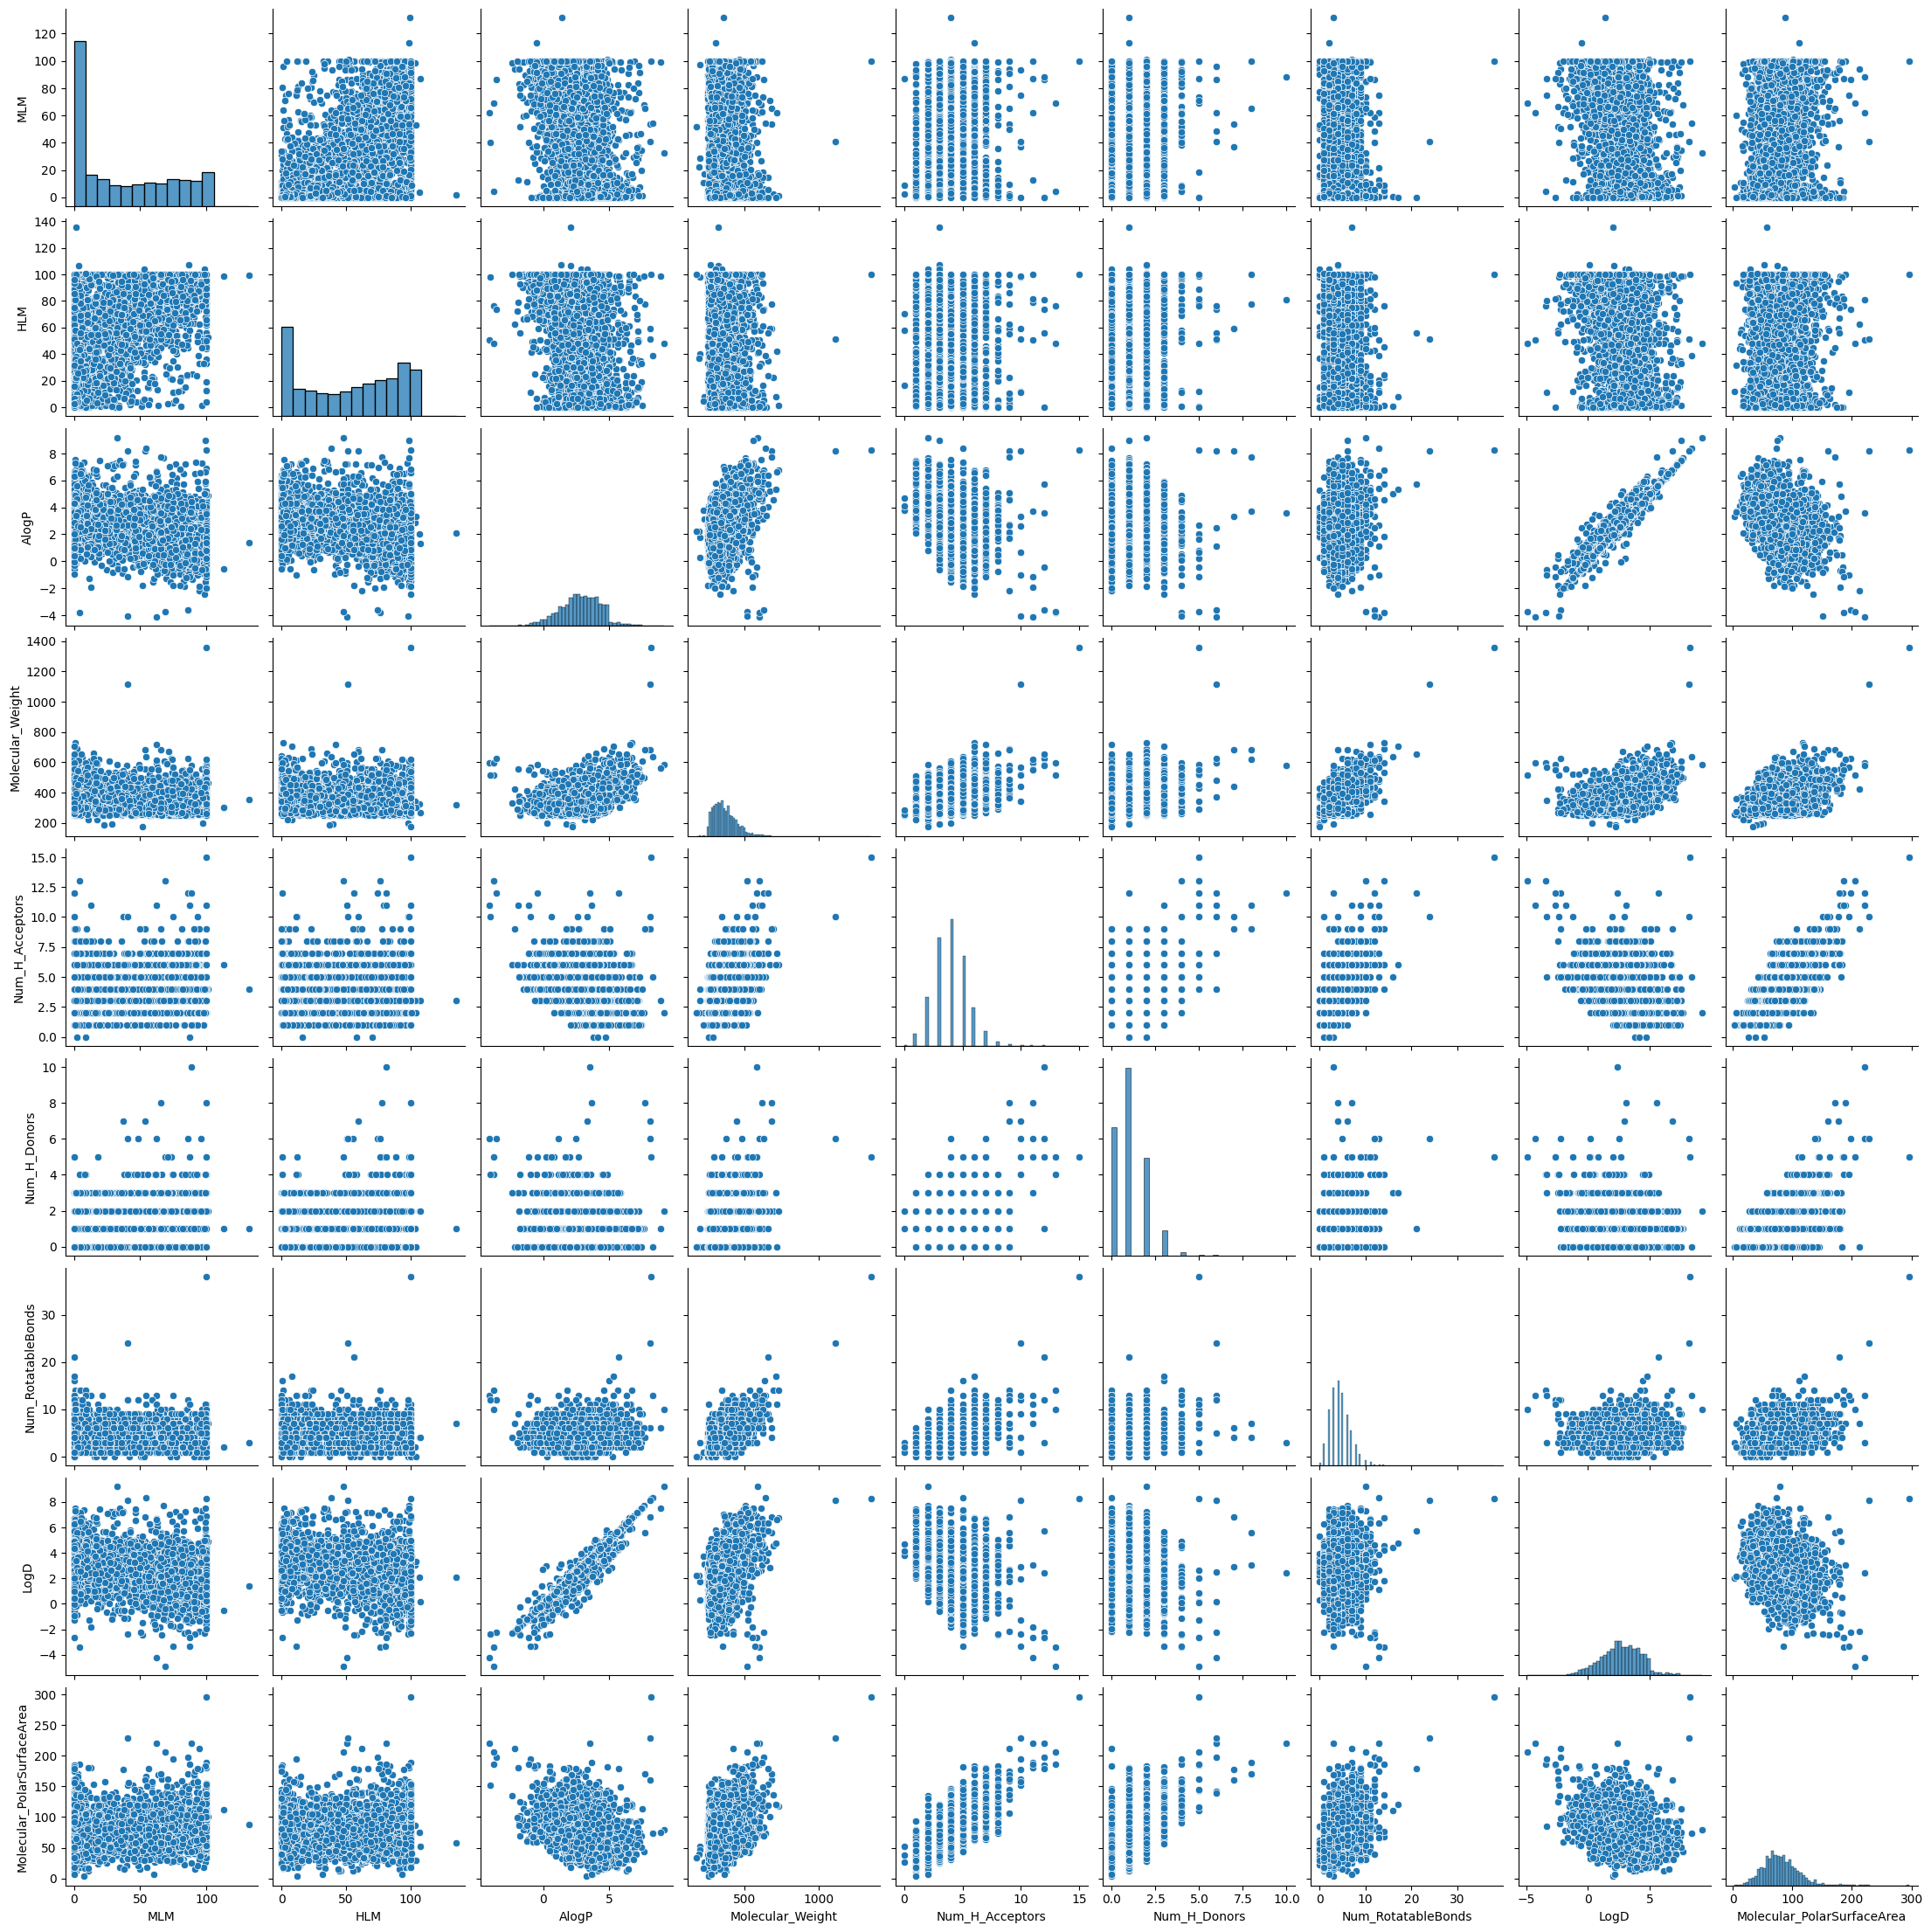

In [5]:
sns.pairplot(df);

# 선형 형태의 데이터만 따로 시각화 하기

#### 칼럼설명
- smiles: 분자구조 형태
- MLM : 쥐에서의 대사효소 결과 남은 양(%)
- AlogP : 화학물질의 지방 수용성
- Molecular_weight : 분자량 ( m < 500, 350~400 적절)
- H_acceptors : 수소 수용체 약효가 떨어짐
- H_donors : 수소공여체, 약효떨어짐, 7개 이하 약효 좋다, 10개 이상 약효 떨어짐(회전가능한bond)
- Molecular_PolarSurfaceArea: 140이상 세포투과 능력 낮음. 


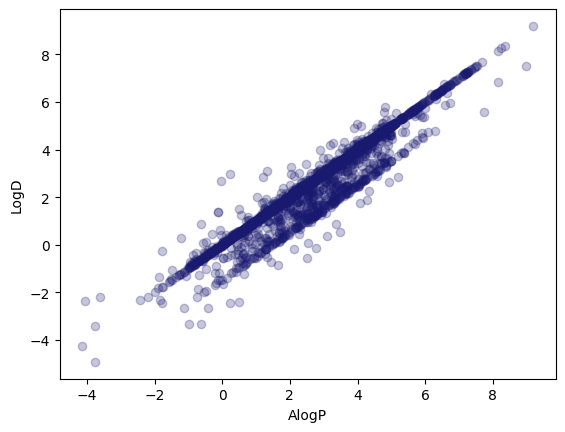

In [ ]:
plt.scatter(x='AlogP',
            y='LogD',
            data=df,
            c='midnightblue',
            alpha=.25)
plt.xlabel("AlogP")
plt.ylabel("LogD")
plt.show()

# LogP[D] 와 M[H]LM의 시각화로 확인 해보기 

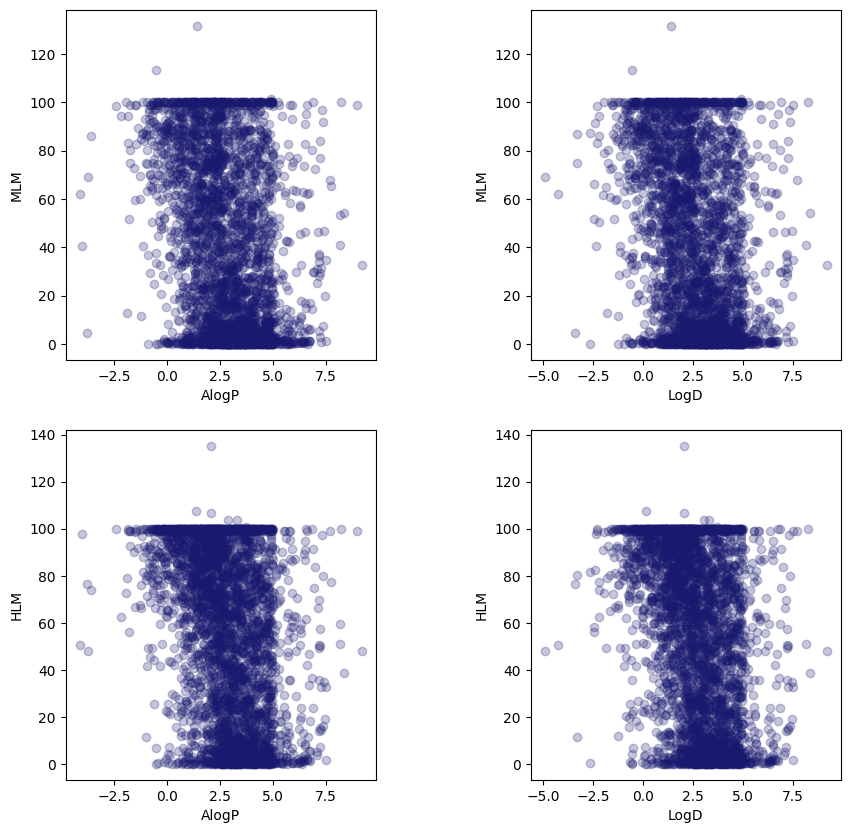

In [ ]:
x_list = ['AlogP', 'LogD']
y_list = ['MLM', 'HLM']

plt.figure(figsize=(10, 10))

for i in range(len(y_list)):
    for j in range(len(x_list)):
        plt.subplot(2, 2, i * len(x_list) + j + 1)
        plt.scatter(x=x_list[j],
                    y=y_list[i],
                    data=df,
                    c='midnightblue',
                    alpha=0.25)
        plt.xlabel(x_list[j])
        plt.ylabel(y_list[i])
        plt.subplots_adjust(wspace=0.5)

plt.show()

# 100%를 초과한 데이터 확인 해보기

In [ ]:
print(len(df[(df['MLM'] > 100.0) | (df['HLM'] > 100.0)]))
display(df[(df['MLM'] > 100.0) | (df['HLM'] > 100.0)])

9


,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
662,TRAIN_0662,O=C(Nc1ccccc1)C1CCCN1C1=NS(=O)(=O)c2ccccc21,131.720,99.570,1.412,355.411,4,1,3,1.412,87.22
1092,TRAIN_1092,COc1c(NC(=O)c2ccc[nH]2)cc(Cl)cc1C(=O)N(C)C,3.820,106.510,2.061,321.759,3,2,4,2.061,74.43
1584,TRAIN_1584,CN(C)S(=O)(=O)CCNCc1ccc(-c2ccccc2)cc1,1.745,135.336,2.075,318.434,3,1,7,2.052,57.79
2159,TRAIN_2159,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,113.210,99.000,-0.533,302.289,6,1,2,-0.533,111.44
2410,TRAIN_2410,CC(C)CCC1CCN(C(=O)C2CC(O)CN2)CC1,86.878,107.323,1.345,268.395,3,2,4,0.139,52.57
2586,TRAIN_2586,Cc1nc(-c2c[nH]c(C(=O)N3CCOc4cc(F)ccc43)c2)cs1,98.550,103.720,2.876,343.375,3,1,2,3.032,86.46
2948,TRAIN_2948,CCCC(=O)Nc1cc(C(=O)NC2CCCCC2)ccc1S(=O)(=O)c1cc...,101.380,52.330,4.906,462.989,4,2,7,4.906,100.72
3157,TRAIN_3157,CN1C(=O)c2cccc3c2C1=Cc1ccc2ccccc2c1O3,52.847,103.907,3.319,299.323,2,0,0,3.319,29.54
3403,TRAIN_3403,c1cnc2c(C3NCCc4c3[nH]c3ccccc43)cccc2c1,8.890,100.830,3.719,299.369,2,2,1,3.719,40.71


In [7]:
over_100 = df[(df['MLM'] > 100.0) | (df['HLM'] > 100.0)]
over_100.index

Index([662, 1092, 1584, 2159, 2410, 2586, 2948, 3157, 3403], dtype='int64')

# 100% 초과한 데이터 없애기

In [8]:
df.drop(index=over_100.index, axis=0, inplace=True)
df

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


# 다시 시각화 해보기

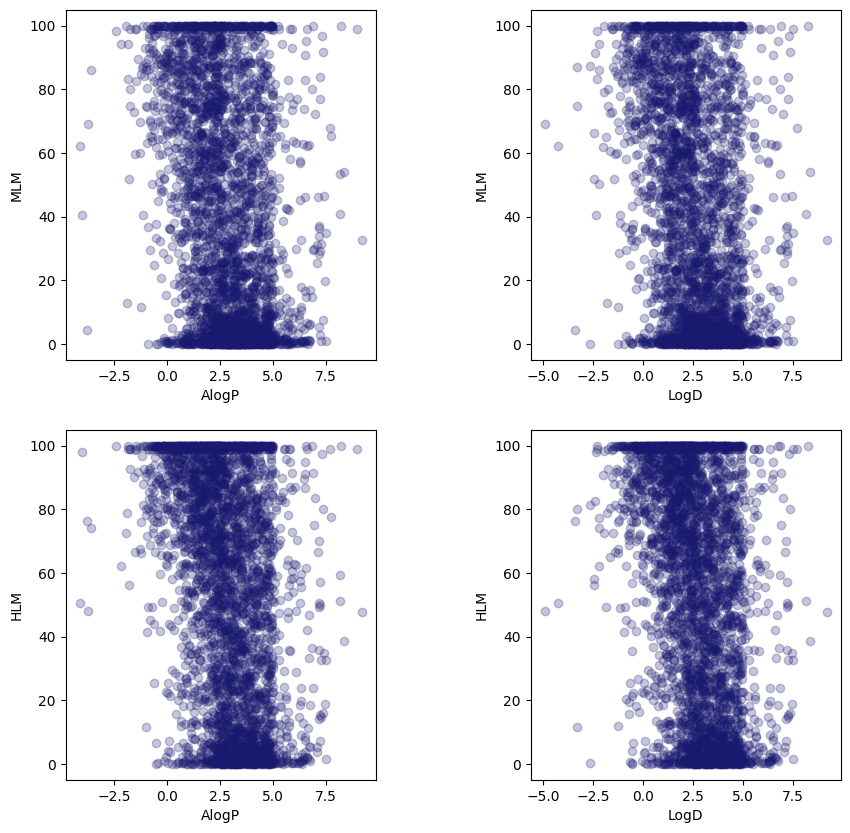

In [9]:
x_list = ['AlogP', 'LogD']
y_list = ['MLM', 'HLM']

plt.figure(figsize=(10, 10))

for i in range(len(y_list)):
    for j in range(len(x_list)):
        plt.subplot(2, 2, i * len(x_list) + j + 1)
        plt.scatter(x=x_list[j],
                    y=y_list[i],
                    data=df,
                    c='midnightblue',
                    alpha=0.25)
        plt.xlabel(x_list[j])
        plt.ylabel(y_list[i])
        plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
df.columns

Index(['id', 'SMILES', 'MLM', 'HLM', 'AlogP', 'Molecular_Weight',
       'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
       'Molecular_PolarSurfaceArea'],
      dtype='object')

# LogP[D]와 Molecular_Weight의 시각화 해보기

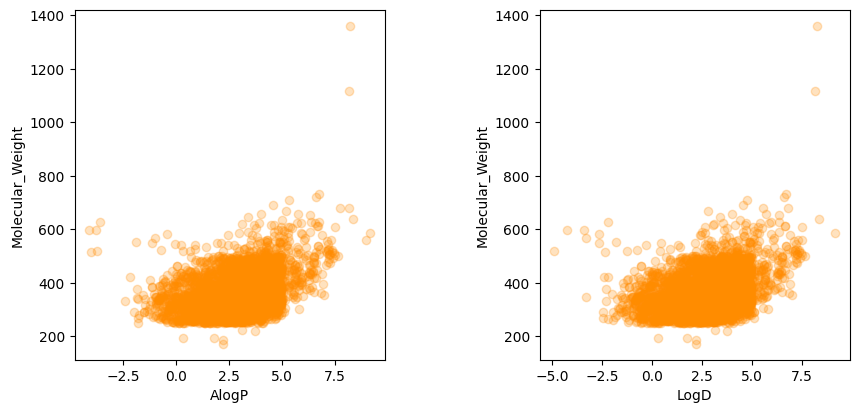

In [ ]:
x_list = ['AlogP', 'LogD']
y_list = ['Molecular_Weight']

plt.figure(figsize=(10, 10))

for i in range(len(x_list)):
    for j in range(len(y_list)):
        plt.subplot(2, 2, i + 1)
        plt.scatter(x=x_list[i],
                    y=y_list[j],
                    data=df,
                    c='darkorange',
                    alpha=0.25)
        plt.xlabel(x_list[i])
        plt.ylabel(y_list[j])
        plt.subplots_adjust(wspace=0.5)

plt.show()

# Molecular_Weight가 1000을 초과한 데이터 확인 해보기

In [ ]:
print(len(df[(df['Molecular_Weight'] > 1000.0)]))
display(df[(df['Molecular_Weight'] > 1000.0)])

2


,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
1172,TRAIN_1172,COC(=O)c1cc(F)c(NCCCN(CCCCN(CCCn2c(=O)[nH]c3cc...,99.900,99.900,8.241,1360.467,15,5,38,8.257,296.43
2711,TRAIN_2711,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,40.761,51.084,8.163,1115.264,10,6,24,8.156,229.23


# LogP[D]와 Num_RotatableBonds 시각화 해보기

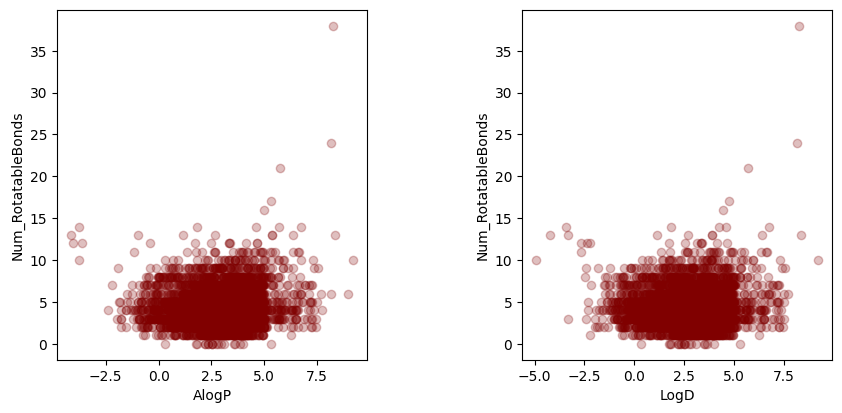

In [ ]:
x_list = ['AlogP', 'LogD']
y_list = ['Num_RotatableBonds']

plt.figure(figsize=(10, 10))

for i in range(len(x_list)):
    for j in range(len(y_list)):
        plt.subplot(2, 2, i + 1)
        plt.scatter(x=x_list[i],
                    y=y_list[j],
                    data=df,
                    c='maroon',
                    alpha=0.25)
        plt.xlabel(x_list[i])
        plt.ylabel(y_list[j])
        plt.subplots_adjust(wspace=0.5)

plt.show()

# Num_RotatableBonds가 20을 초과한 데이터 확인 해보기

In [ ]:
print(len(df[(df['Num_RotatableBonds'] > 20)]))
display(df[(df['Num_RotatableBonds'] > 20) ])

3


,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
1172,TRAIN_1172,COC(=O)c1cc(F)c(NCCCN(CCCCN(CCCn2c(=O)[nH]c3cc...,99.900,99.900,8.241,1360.467,15,5,38,8.257,296.43
2367,TRAIN_2367,[H][C@@](OC(=O)CCC)([C@@]([H])(COC(=O)CCC)OC(=...,0.000,56.260,5.754,656.723,12,1,21,5.703,179.33
2711,TRAIN_2711,CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F...,40.761,51.084,8.163,1115.264,10,6,24,8.156,229.23


# LogP[D]와 Molecular_PolarSurfaceArea 시각화 해보기

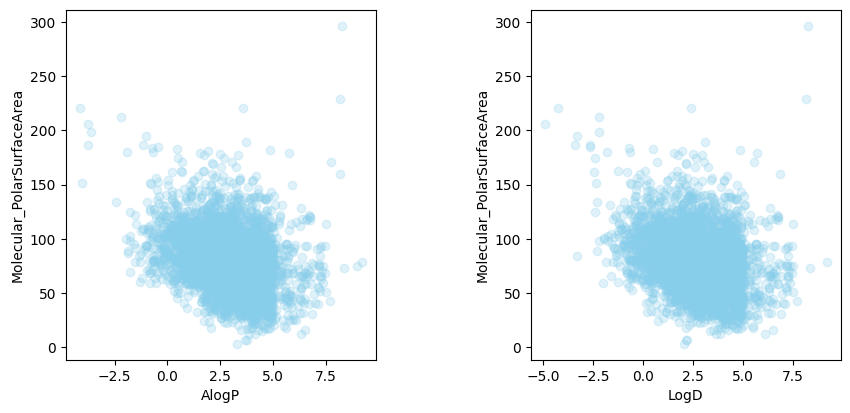

In [ ]:
x_list = ['AlogP', 'LogD']
y_list = ['Molecular_PolarSurfaceArea']

plt.figure(figsize=(10, 10))

for i in range(len(x_list)):
    for j in range(len(y_list)):
        plt.subplot(2, 2, i + 1)
        plt.scatter(x=x_list[i],
                    y=y_list[j],
                    data=df,
                    c='skyblue',
                    alpha=0.25)
        plt.xlabel(x_list[i])
        plt.ylabel(y_list[j])
        plt.subplots_adjust(wspace=0.5)

plt.show()

# Molecular_PolarSurfaceArea가 250을 초과한 데이터 확인 해보기

In [ ]:
print(len(df[(df['Molecular_PolarSurfaceArea'] > 250)]))
display(df[(df['Molecular_PolarSurfaceArea'] > 250) ])

1


,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
1172,TRAIN_1172,COC(=O)c1cc(F)c(NCCCN(CCCCN(CCCn2c(=O)[nH]c3cc...,99.9,99.9,8.241,1360.467,15,5,38,8.257,296.43


# 없앨 index를 추출하여 원본 데이터에서 삭제하기.  

In [11]:
over_1000 = df[(df['Molecular_Weight'] > 1000.0)]
over_20 = df[(df['Num_RotatableBonds'] > 20) ]
over_250 = df[(df['Molecular_PolarSurfaceArea'] > 250)]

In [32]:
over_1000.index[0], over_20.index[:2], over_250.index[:]

(1172, Index([1172, 2367], dtype='int64'), Index([1172], dtype='int64'))

In [46]:
df.drop(index=over_1000.index[0], axis=0, inplace=True)
df.drop(index=over_20.index[1], axis=0, inplace=True)

In [47]:
len(df)

3487

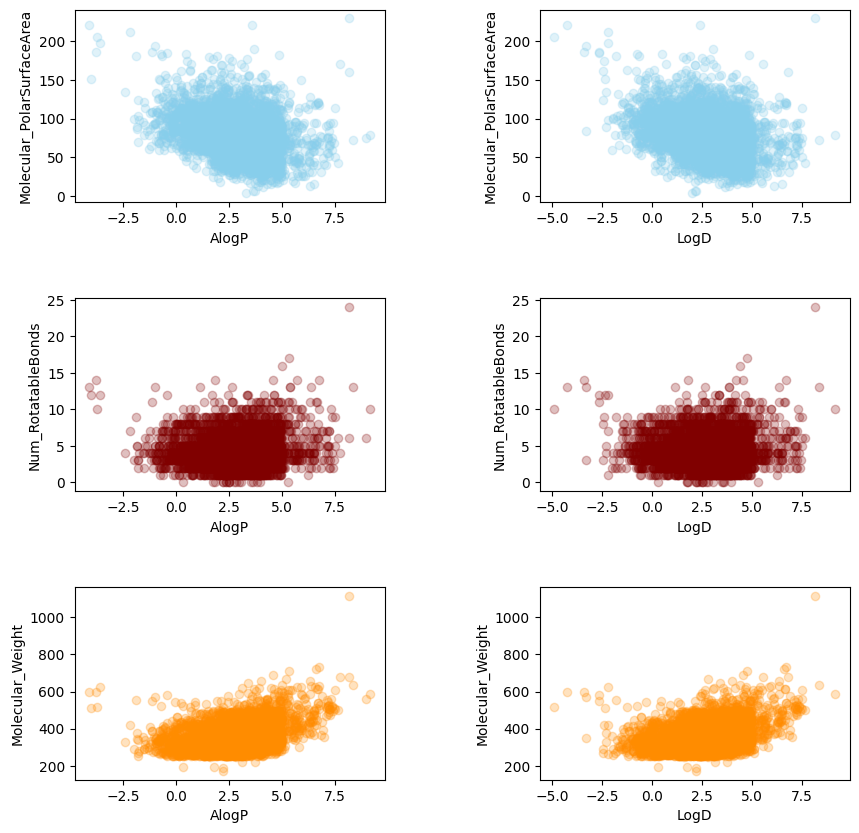

In [61]:
x_list = ['AlogP', 'LogD']
y_list = ['Molecular_PolarSurfaceArea', 'Num_RotatableBonds', 'Molecular_Weight']
colors = ['skyblue', 'maroon', 'darkorange']

plt.figure(figsize=(10, 10))

for i in range(len(y_list)):
    for j in range(len(x_list)):
        plt.subplot(len(y_list), len(x_list), i * len(x_list) + j + 1)
        plt.scatter(x=x_list[j],
                    y=y_list[i],
                    data=df,
                    c=colors[i],
                    alpha=0.25)
        plt.xlabel(x_list[j])
        plt.ylabel(y_list[i])
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

# 지표 기준으로 신약 효과를 다소 많이 볼 수 있는 데이터만 뽑아보기

In [ ]:
df[(df['AlogP'] <= 5) & (df["Molecular_Weight"] <= 400) & (df["Molecular_Weight"] >= 350) &\
   (df['Num_RotatableBonds']<=7) & (df['Num_H_Donors'] < 5) & (df['Num_H_Acceptors'] < 10)]

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
9,TRAIN_0009,CCN1CCCC1CNC(=O)C1CCCN(c2ncnc3[nH]cnc23)C1,73.417,76.291,1.259,357.453,5,2,5,-0.373,90.04
22,TRAIN_0022,O=C(C1CC(=O)N(c2n[nH]c3cc(Br)ccc23)C1)N1CCCC1,99.900,99.900,1.907,377.236,3,1,2,1.907,69.30
28,TRAIN_0028,CC(C)CCN(C)C1CCN(S(=O)(=O)c2ccc(C(C)(C)C)cc2)CC1,3.855,54.218,4.038,380.588,3,0,7,2.478,49.00
32,TRAIN_0032,c1ccc2c(c1)OCC(c1csc(C3COc4ccccc4O3)n1)O2,55.941,78.013,3.703,353.392,5,0,2,3.703,78.05
35,TRAIN_0035,O=C(Nc1ccccc1Cl)NC1(C(=O)N2CCC(O)CC2)CCCCC1,81.570,99.000,2.237,379.881,3,3,3,2.237,81.67
...,...,...,...,...,...,...,...,...,...,...,...
3481,TRAIN_3481,O=C(Nc1cc2ccc(O)cc2s1)Nc1ccc(Br)cc1F,36.151,69.465,4.221,381.220,2,3,2,4.220,89.60
3490,TRAIN_3490,Cn1c(=O)c(-c2ccc3ccccc3n2)cc2cc(Br)ccc21,0.338,6.578,4.300,365.223,2,0,1,4.564,33.20
3492,TRAIN_3492,CN1CC2(CCN(C(=O)NC3CCCCC3)CC2)CC1C(=O)N1CCOCC1,82.271,83.464,1.073,392.536,4,1,2,-0.484,65.12
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74


# 결측치 확인 및 시각화

In [ ]:
df.isnull().sum()

id                            0
SMILES                        0
MLM                           0
HLM                           0
AlogP                         2
Molecular_Weight              0
Num_H_Acceptors               0
Num_H_Donors                  0
Num_RotatableBonds            0
LogD                          0
Molecular_PolarSurfaceArea    0
dtype: int64

In [ ]:
import missingno as msno

<Axes: >

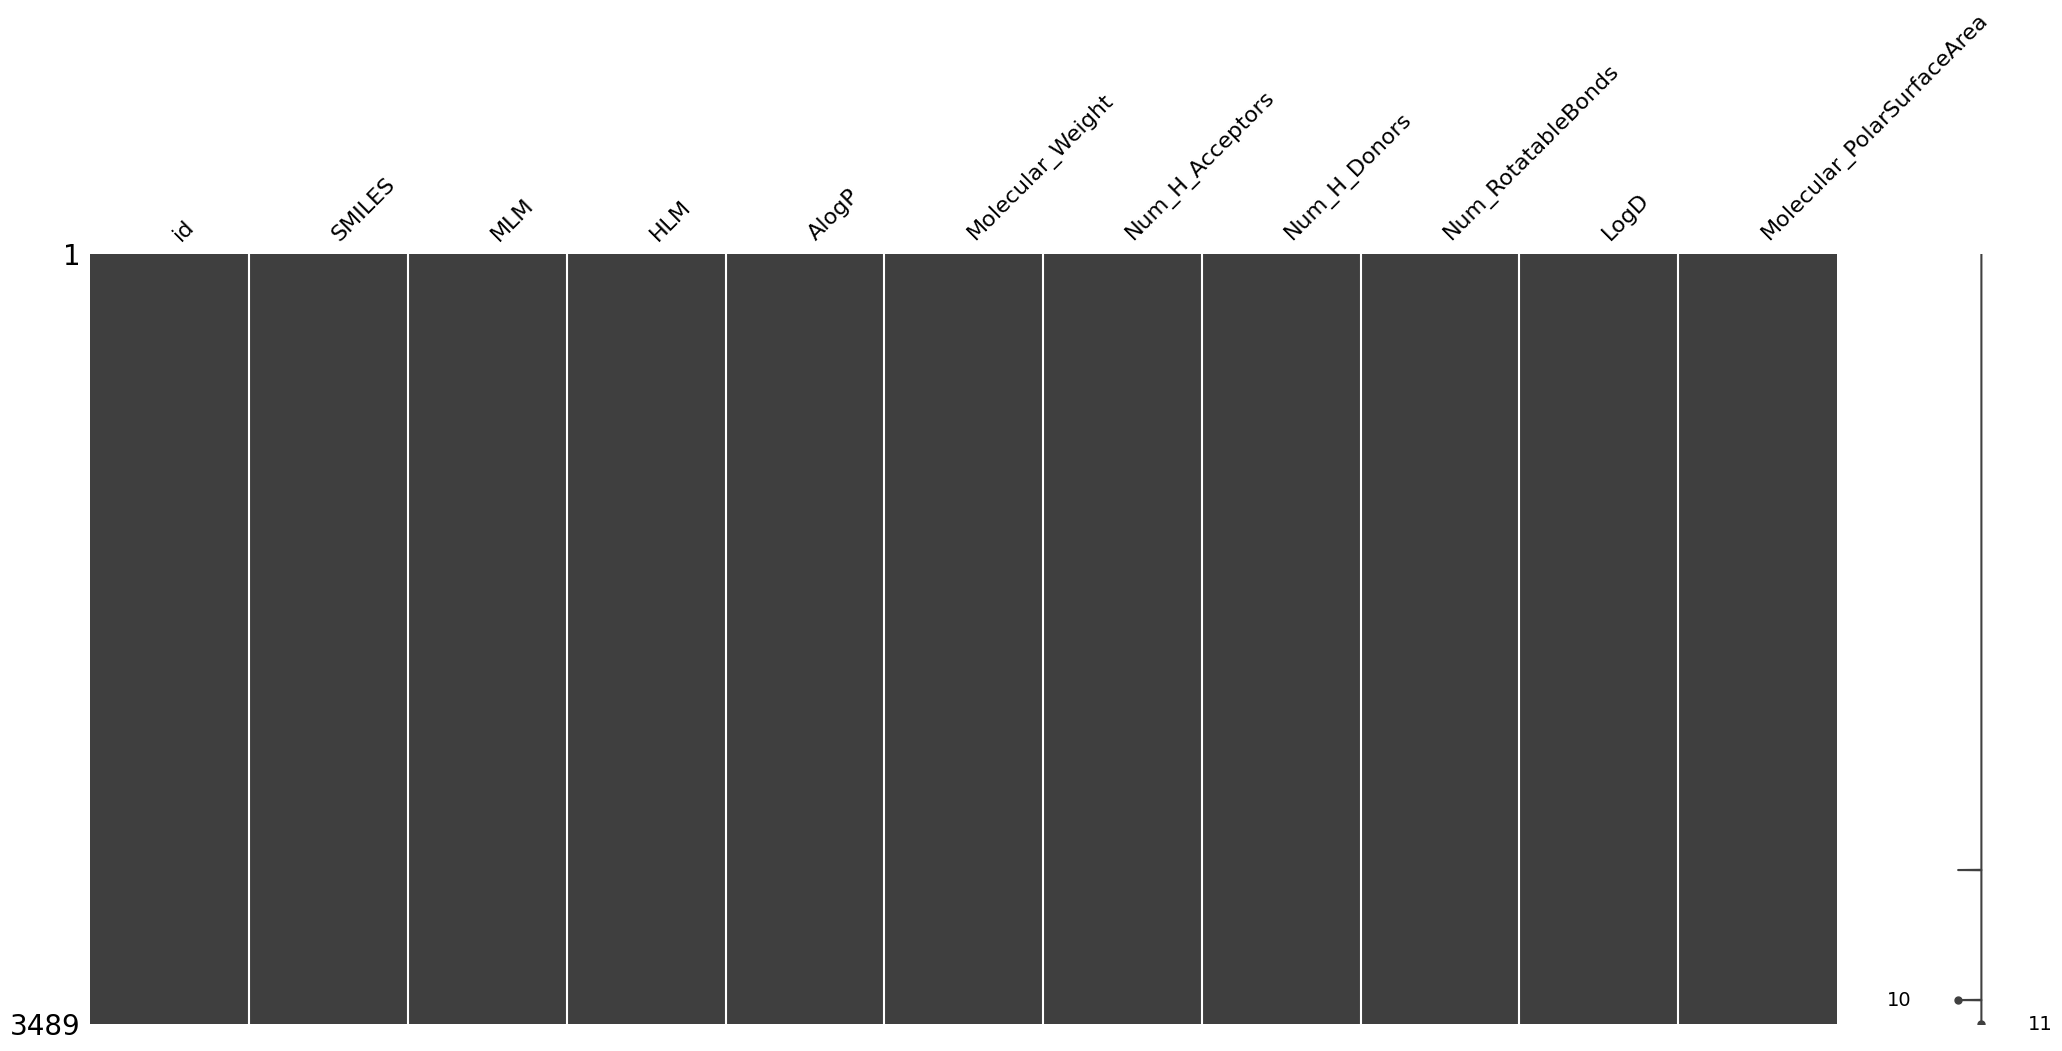

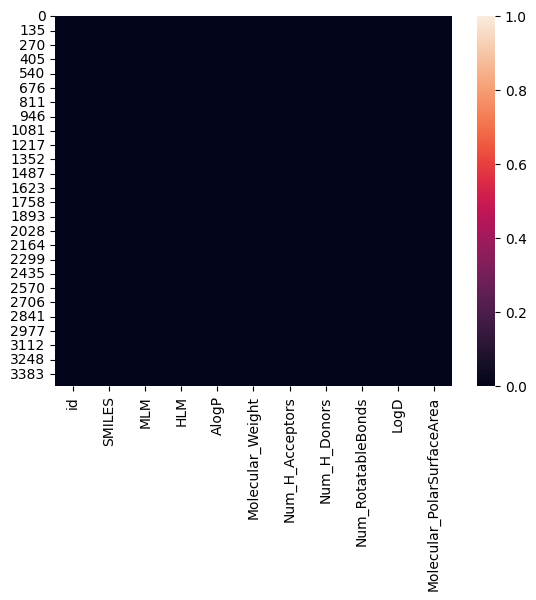

In [ ]:
msno.matrix(df)

plt.figure()
sns.heatmap(df.isnull())

<Axes: >

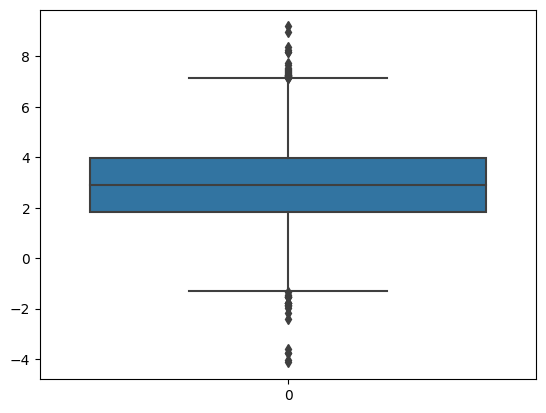

In [ ]:
sns.boxplot(df["AlogP"])

In [ ]:
df[(df["AlogP"] >= 7) | (df["AlogP"] <= -1)]

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
16,TRAIN_0016,Cc1[nH]c(=O)[nH]c(=O)c1S(=O)(=O)NCC1CCCO1,59.496,66.631,-1.524,289.308,5,3,4,-1.424,121.98
179,TRAIN_0179,CCC(CN1CCN(C)CC1)NC(=O)Cc1csc(Nc2ccccc2F)n1,62.030,50.590,-4.137,597.656,11,6,13,-4.241,220.86
216,TRAIN_0216,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,40.530,87.780,-1.133,385.417,7,0,4,-1.133,108.65
220,TRAIN_0220,Cc1cc(C)cc(NC(=O)N2Cc3c(sc4c3CCCC4)-n3cccc3C2c...,31.210,32.470,7.257,473.653,1,1,2,7.257,93.75
248,TRAIN_0248,[H][C@]1(c2cc(O)cc(O)c2)c2c(cc3c(c2/C=C/c2ccc(...,53.470,59.341,8.166,680.698,9,7,6,6.837,160.07
...,...,...,...,...,...,...,...,...,...,...,...
3240,TRAIN_3240,CN1C[C@H](NC(=O)CC2=C(c3ccccc3)CCC2=O)C[C@H]1C...,94.280,99.990,-1.853,342.389,5,2,5,-1.353,86.71
3311,TRAIN_3311,Clc1n[nH]c2c(CN(Cc3ccccc3)CC3CCCO3)cncc12,87.157,81.386,-1.141,548.973,11,5,11,-2.653,186.17
3344,TRAIN_3344,CCN1C=CC(=C(C=C2C=CC(=O)C=C2)CS(=O)(=O)[O-])C=C1,84.759,66.346,-1.231,318.368,4,0,4,-1.230,85.88
3355,TRAIN_3355,Cn1nc2n(c1=O)CCN(C(=O)CCn1cnnn1)CC2,99.900,72.556,-1.972,292.297,6,0,3,-1.972,99.82


# 특정 데이터 없애기 전 후 describe

In [ ]:
# 특정 데이터 없애기 전
df.describe()

,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
count,3498.000000,3498.000000,3496.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,37.384742,53.090206,2.841399,363.881846,4.016581,1.098628,4.561178,2.682156,79.747278
std,35.695993,36.080081,1.608073,79.527022,1.511091,0.976266,2.357243,1.666996,28.849229
min,0.000000,0.000000,-4.137000,172.180000,0.000000,0.000000,0.000000,-4.920000,3.240000
25%,2.433000,15.905500,1.833000,304.389750,3.000000,0.000000,3.000000,1.620000,60.150000
50%,26.193000,58.023000,2.889000,350.255000,4.000000,1.000000,4.000000,2.709000,77.525000
75%,70.807250,87.753000,3.958250,409.744750,5.000000,2.000000,6.000000,3.860000,96.540000
max,131.720000,135.336000,9.190000,1360.467000,15.000000,10.000000,38.000000,9.190000,296.430000


In [51]:
# 특정 데이터 없애기 후
df.describe()

,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
count,3487.000000,3487.000000,3485.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000
mean,37.302233,52.952353,2.840275,363.599129,4.012905,1.096931,4.550043,2.680847,79.678618
std,35.616765,36.031546,1.605274,77.619357,1.494340,0.974906,2.271138,1.663948,28.576642
min,0.000000,0.000000,-4.137000,172.180000,0.000000,0.000000,0.000000,-4.920000,3.240000
25%,2.426000,15.667500,1.833000,304.417000,3.000000,0.000000,3.000000,1.620000,60.205000
50%,26.135000,57.852000,2.890000,350.368000,4.000000,1.000000,4.000000,2.709000,77.520000
75%,70.704500,87.582500,3.958000,409.671500,5.000000,2.000000,6.000000,3.860000,96.535000
max,99.990000,99.990000,9.190000,1115.264000,13.000000,10.000000,24.000000,9.190000,229.230000


In [68]:
df.describe().columns

Index(['MLM', 'HLM', 'AlogP', 'Molecular_Weight', 'Num_H_Acceptors',
       'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
       'Molecular_PolarSurfaceArea'],
      dtype='object')

In [69]:
for i in df.describe().columns:
    print(i)

MLM
HLM
AlogP
Molecular_Weight
Num_H_Acceptors
Num_H_Donors
Num_RotatableBonds
LogD
Molecular_PolarSurfaceArea


In [62]:
import statistics

In [70]:
for i in df.describe().columns:
    print(i, ":", statistics.mode(df[i]))

MLM : 99.99
HLM : 99.99
AlogP : 3.886
Molecular_Weight : 313.351
Num_H_Acceptors : 4
Num_H_Donors : 1
Num_RotatableBonds : 4
LogD : 2.721
Molecular_PolarSurfaceArea : 58.64


# 데이터 프레임 저장하기

In [53]:
df.to_csv('preprocessed_data.csv', index=False, encoding = "utf-8-sig")

In [54]:
pd.read_csv("preprocessed_data.csv")

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3482,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3483,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3484,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3485,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


In [4]:
df = pd.read_csv("preprocessed_data.csv")

In [5]:
df.mode()

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,C(=C/c1nnn(Cc2ccccc2)n1)\c1ccccc1,99.99,99.99,2.535,313.351,4.0,1.0,4.0,2.721,58.64
1,TRAIN_0001,CC(=O)Nc1ccc(N2N=C(c3ccc(O)cc3)C(C)CC2=O)cc1,NaN,NaN,3.383,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN_0002,CC(=O)Nc1nc2ccc(-c3nn(C(C)C)c4nc(N)ncc34)cc2s1,NaN,NaN,3.691,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN_0003,CC(C)(C)OC(=O)N1CCC(c2n[nH]c3nc(S(C)(=O)=O)ncc...,NaN,NaN,3.886,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN_0004,CC(C)COc1cc(=O)n2c(c1C(=O)N1CCC(C)CC1)CCCCC2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3482,TRAIN_3493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,TRAIN_3494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3484,TRAIN_3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3485,TRAIN_3496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


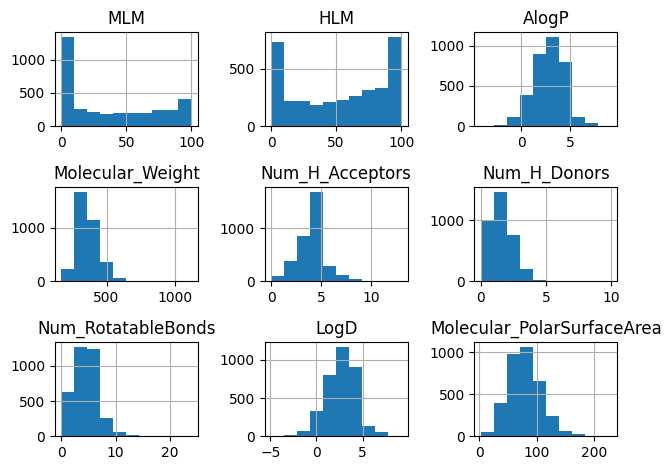

In [7]:
df.hist()
plt.tight_layout() # 그래프 간격 설정
plt.show()